In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
df=pd.read_csv('C:/Users/alexi/Desktop/Iron Hack/Final Project/final_df_before_clustering.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
df.shape

(902, 15)

In [5]:
df.head()

Artist               Artist_id                 Song_id  \
0        Fleetwood Mac  08GQAI4eElDnROBrJRGE0X  703BT1NQsfIwPFv8MXQ47m   
1           Elton John  3PhoLpVuITZKcymswpck5b  2zvot9pY2FNl1E94kc4K8M   
2          Suzi Quatro  15jHZ1EZwmm2QDjKctvqJQ  2NKZe36oAGEpBx26OoBFLj   
3  The Doobie Brothers  39T6qqI0jDtSWWioX8eGJz  2fja4gHzPsIXiK4bMeU0hN   
4      George Harrison  7FIoB5PHdrMZVC3q2HE5MS  1chu8wc9zbNqTQ2ahROys1   

                                                Song  Popularity  \
0                                             Dreams          22   
1  Rocket Man (I Think It's Going To Be A Long Lo...          28   
2                                       Stumblin' In          55   
3                                Listen to the Music          59   
4                                      My Sweet Lord          18   

                                              genres  Artist_popularity  \
0  ['album rock', 'classic rock', 'mellow gold', ...               81.0   
1  ['glam rock', 'mellow gold', 'piano rock', 'ro...               83.0   
2                    ['classic uk pop', 'glam rock']               54.0   
3  ['album rock', 'art rock', 'blues-rock', 'clas...               70.0   
4  ['album rock', 'classic rock', 'folk rock', 'm...               70.0   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.823   0.338   -15.899       0.0413        0.1390   
1         0.601   0.532    -9.119       0.0286        0.4320   
2         0.758   0.634   -13.338       0.0324        0.1270   
3         0.643   0.526   -15.147       0.0349        0.2140   
4         0.537   0.685    -8.935       0.0333        0.0705   

   instrumentalness  liveness  valence  
0          0.001290    0.5000    0.785  
1          0.000006    0.0925    0.341  
2          0.000431    0.3370    0.905  
3          0.000004    0.0690    0.881  
4          0.000000    0.0839    0.542

In [9]:
df1=df.copy()

In [55]:
df1.drop(['Artist','Artist_id','Song_id','genres'],axis=1,inplace=True)

In [58]:
df1.set_index('Song',inplace=True)

In [59]:
df1.head()

Popularity  \
Song                                                             
Dreams                                                    22.0   
Rocket Man (I Think It's Going To Be A Long Lon...        28.0   
Stumblin' In                                              55.0   
Listen to the Music                                       59.0   
My Sweet Lord                                             18.0   

                                                    Artist_popularity  \
Song                                                                    
Dreams                                                           81.0   
Rocket Man (I Think It's Going To Be A Long Lon...               83.0   
Stumblin' In                                                     54.0   
Listen to the Music                                              70.0   
My Sweet Lord                                                    70.0   

                                                    danceability  energy  \
Song                                                                       
Dreams                                                     0.823   0.338   
Rocket Man (I Think It's Going To Be A Long Lon...         0.601   0.532   
Stumblin' In                                               0.758   0.634   
Listen to the Music                                        0.643   0.526   
My Sweet Lord                                              0.537   0.685   

                                                    loudness  speechiness  \
Song                                                                        
Dreams                                               -15.899       0.0413   
Rocket Man (I Think It's Going To Be A Long Lon...    -9.119       0.0286   
Stumblin' In                                         -13.338       0.0324   
Listen to the Music                                  -15.147       0.0349   
My Sweet Lord                                         -8.935       0.0333   

                                                    acousticness  \
Song                                                               
Dreams                                                    0.1390   
Rocket Man (I Think It's Going To Be A Long Lon...        0.4320   
Stumblin' In                                              0.1270   
Listen to the Music                                       0.2140   
My Sweet Lord                                             0.0705   

                                                    instrumentalness  \
Song                                                                   
Dreams                                                      0.001290   
Rocket Man (I Think It's Going To Be A Long Lon...          0.000006   
Stumblin' In                                                0.000431   
Listen to the Music                                         0.000004   
My Sweet Lord                                               0.000000   

                                                    liveness  valence  
Song                                                                   
Dreams                                                0.5000    0.785  
Rocket Man (I Think It's Going To Be A Long Lon...    0.0925    0.341  
Stumblin' In                                          0.3370    0.905  
Listen to the Music                                   0.0690    0.881  
My Sweet Lord                                         0.0839    0.542

In [27]:
df1['Popularity']=df1.Popularity.astype('float64')             

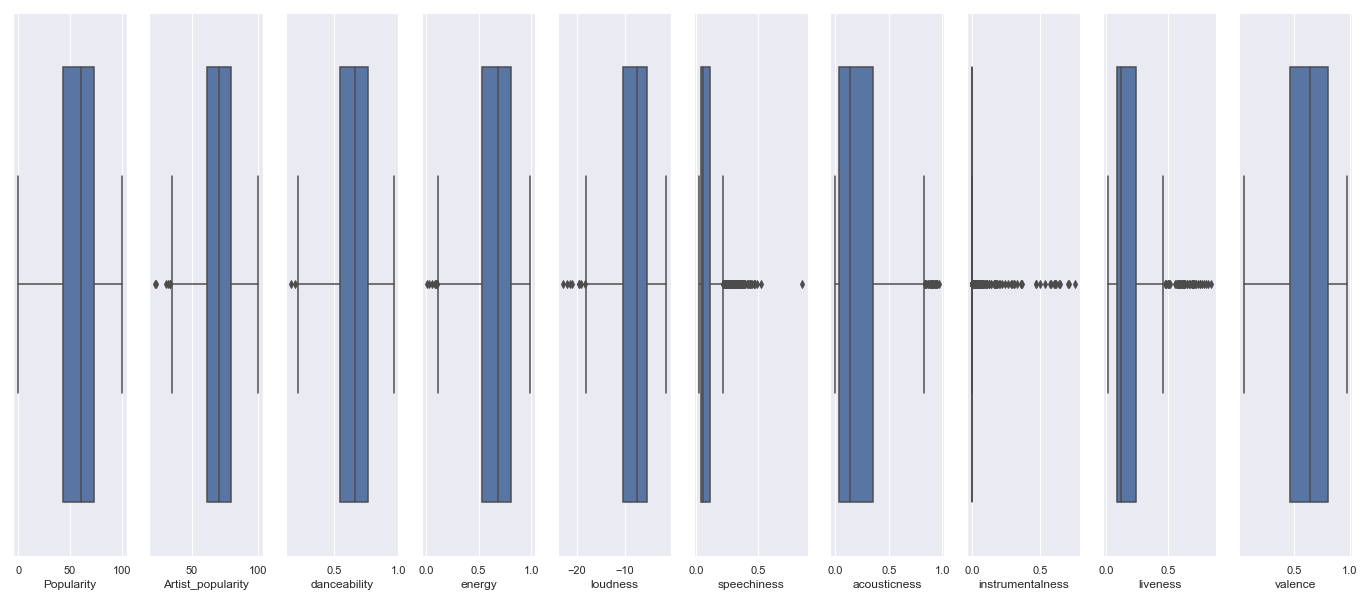

In [46]:
f, axes = plt.subplots(ncols=10,nrows=1,figsize=(24,10))
sns.boxplot(df1.Popularity,ax=axes[0])
sns.boxplot(df1.Artist_popularity,ax=axes[1])
sns.boxplot(df1.danceability,ax=axes[2])
sns.boxplot(df1.energy,ax=axes[3])
sns.boxplot(df1.loudness,ax=axes[4])
sns.boxplot(df1.speechiness,ax=axes[5])
sns.boxplot(df1.acousticness,ax=axes[6])
sns.boxplot(df1.instrumentalness,ax=axes[7])
sns.boxplot(df1.liveness,ax=axes[8])
sns.boxplot(df1.valence,ax=axes[9])

In [78]:
df1.loc[df1.Artist_popularity]

C:\Users\alexi\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Empty DataFrame
Columns: [Popularity, Artist_popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence]
Index: []

In [60]:
corr=df1.corr()

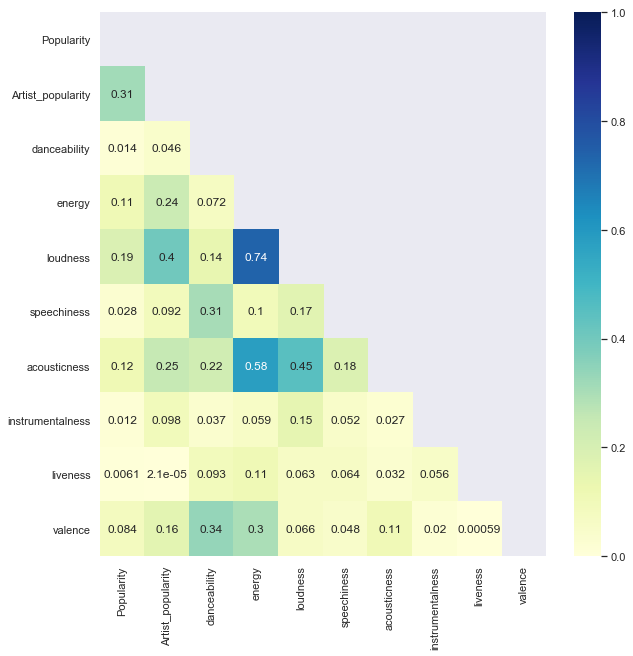

In [61]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr.abs(),annot=True, mask=mask,  cmap="YlGnBu")

## K Means 

In [76]:
df1.head()

Popularity  \
Song                                                             
Dreams                                                    22.0   
Rocket Man (I Think It's Going To Be A Long Lon...        28.0   
Stumblin' In                                              55.0   
Listen to the Music                                       59.0   
My Sweet Lord                                             18.0   

                                                    Artist_popularity  \
Song                                                                    
Dreams                                                           81.0   
Rocket Man (I Think It's Going To Be A Long Lon...               83.0   
Stumblin' In                                                     54.0   
Listen to the Music                                              70.0   
My Sweet Lord                                                    70.0   

                                                    danceability  energy  \
Song                                                                       
Dreams                                                     0.823   0.338   
Rocket Man (I Think It's Going To Be A Long Lon...         0.601   0.532   
Stumblin' In                                               0.758   0.634   
Listen to the Music                                        0.643   0.526   
My Sweet Lord                                              0.537   0.685   

                                                    loudness  speechiness  \
Song                                                                        
Dreams                                               -15.899       0.0413   
Rocket Man (I Think It's Going To Be A Long Lon...    -9.119       0.0286   
Stumblin' In                                         -13.338       0.0324   
Listen to the Music                                  -15.147       0.0349   
My Sweet Lord                                         -8.935       0.0333   

                                                    acousticness  \
Song                                                               
Dreams                                                    0.1390   
Rocket Man (I Think It's Going To Be A Long Lon...        0.4320   
Stumblin' In                                              0.1270   
Listen to the Music                                       0.2140   
My Sweet Lord                                             0.0705   

                                                    instrumentalness  \
Song                                                                   
Dreams                                                      0.001290   
Rocket Man (I Think It's Going To Be A Long Lon...          0.000006   
Stumblin' In                                                0.000431   
Listen to the Music                                         0.000004   
My Sweet Lord                                               0.000000   

                                                    liveness  valence  
Song                                                                   
Dreams                                                0.5000    0.785  
Rocket Man (I Think It's Going To Be A Long Lon...    0.0925    0.341  
Stumblin' In                                          0.3370    0.905  
Listen to the Music                                   0.0690    0.881  
My Sweet Lord                                         0.0839    0.542

In [80]:
df1.isnull().sum()

Popularity           0
Artist_popularity    0
danceability         0
energy               0
loudness             0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
dtype: int64

In [79]:
df1.dropna(axis=0,inplace=True)

In [88]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)
km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
y_k=km.predict(df1)

In [84]:
from sklearn.metrics import silhouette_score

In [90]:
score = silhouette_score(df1, y_k, metric='euclidean')
score

0.46121823699307407

In [86]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

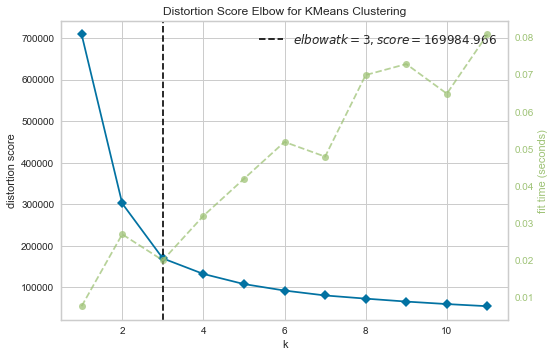

In [87]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df1)
visualizer.poof();

## PCA K-Means

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca=PCA(2)

In [93]:
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
pca.explained_variance_ratio_

array([0.78287531, 0.20297283])

In [98]:
pca.explained_variance_ratio_.sum()

0.9858481349401076

In [96]:
df_pca=pca.fit_transform(df1)
df_pca

array([[ 29.82952411, -17.57918163],
       [ 23.29669394, -18.8057709 ],
       [  3.98287325,  16.02463224],
       ...,
       [ -2.64792778,   1.60436251],
       [ -3.21355902,   7.80000623],
       [ -1.16911236,   7.63340714]])

In [97]:
df_pca=pd.DataFrame(data=df_pca,columns=['pc1','pc2'])

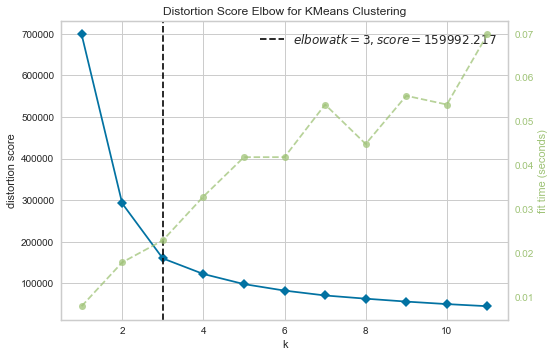

In [99]:
model=KMeans()
viz=KElbowVisualizer(model,k=(1,12))
viz.fit(df_pca)
viz.poof()

In [100]:
model=KMeans(3)

In [101]:
model.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [102]:
df_pca['km_labels']=model.fit_predict(df_pca)

In [103]:
df_pca

pc1        pc2  km_labels
0    29.829524 -17.579182          1
1    23.296694 -18.805771          1
2     3.982873  16.024632          2
3    -3.579337   1.702275          2
4    36.044236  -8.628388          1
5    36.977193  -4.769150          1
6     6.070718  28.886384          2
7    29.314320 -15.183655          1
8   -19.172088   9.813869          0
9    43.010993  -9.782830          1
10   38.098881 -12.976912          1
11   29.922806  -4.399736          1
12   -9.759560  10.485407          2
13   -5.697615  -2.566314          0
14  -22.340059   9.497614          0
15   37.600277  -2.366687          1
16   25.229510 -19.310204          1
17   30.829907  -8.783372          1
18  -15.497408  -0.456260          0
19   -5.826511   9.681444          2
20  -22.364615   4.951669          0
21  -20.943591   2.380524          0
22    9.628435  14.050508          2
23    1.879790  -1.094993          2
24    5.524949  14.080139          2
25   60.352928  15.526050          1
26  -20.090756  -2.426590          0
27   -0.066282  20.690701          2
28  -13.611318   2.851030          0
29  -16.367391   8.512275          0
..         ...        ...        ...
871 -13.401862   4.004069          0
872  -3.712391  -2.912209          2
873 -10.105028   0.496936          0
874  16.790153 -11.528880          1
875  -0.046139  12.326806          2
876 -17.929219   6.444752          0
877 -16.613063   3.297405          0
878 -17.156803  -7.550815          0
879  47.430591  -8.336847          1
880 -15.111348 -15.879047          0
881  -1.008753  12.590338          2
882   3.654887   6.348701          2
883   2.969431  11.922266          2
884  -3.879490   9.220061          2
885 -20.135834  -2.563393          0
886  44.580200  -3.220879          1
887 -22.892502   7.048330          0
888 -20.187124   9.658940          0
889  43.079096   3.320027          1
890 -15.389150   8.555583          0
891 -14.313888  -0.052301          0
892 -13.975760  14.126814          2
893  -2.833294  13.421788          2
894  -5.373294   7.098206          2
895 -17.263041   9.237838          0
896 -19.752835   7.539012          0
897   1.437705   1.261100          2
898  -2.647928   1.604363          2
899  -3.213559   7.800006          2
900  -1.169112   7.633407          2

[901 rows x 3 columns]

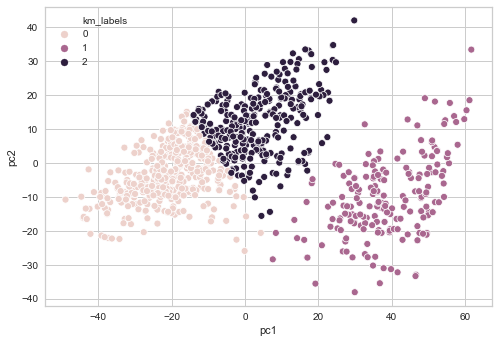

In [104]:
sns.scatterplot(x='pc1',y='pc2',data=df_pca,hue='km_labels')

In [105]:
score = silhouette_score(df_pca, df_pca['km_labels'], metric='euclidean')
score

0.48134203241547513

## Standard Scaler 

In [176]:
from sklearn.preprocessing import StandardScaler

In [179]:
df_std=df1.drop('cluster_kmeans',axis=1)

In [180]:
scaler = StandardScaler()

In [186]:
df_std=pd.DataFrame(scaler.fit_transform(df_std),columns=df_std.columns)

In [187]:
df_std

Popularity  Artist_popularity  danceability    energy  loudness  \
0     -1.360788           0.811386      1.126178 -1.610349 -2.139288   
1     -1.113796           0.959359     -0.337635 -0.629663 -0.278993   
2     -0.002330          -1.186245      0.697584 -0.114045 -1.436602   
3      0.162331          -0.002463     -0.060698 -0.659994 -1.932955   
4     -1.525450          -0.002463     -0.759636  0.143765 -0.228507   
5     -1.525450          -0.298409      0.170084 -0.174706 -0.212044   
6      0.038835          -2.148067      0.427240 -1.266603 -1.605620   
7     -1.319623           0.589427     -0.067291  0.396519 -0.209575   
8      0.862143          -0.372395      0.044802  0.108379 -0.021350   
9     -1.813607          -0.002463      0.354709 -1.347485 -1.528519   
10    -1.648946           0.293482     -0.476104 -0.114045 -0.811016   
11    -1.237292          -0.150436     -0.416760 -1.377815 -1.913199   
12     0.491655          -0.594354      1.132772  0.416739  0.248091   
13     0.203497           0.293482     -0.700292 -0.149430 -0.256494   
14     0.985639          -0.298409      0.519553  0.745319  0.132028   
15    -1.525450          -0.446381      1.218491 -1.398036 -1.437425   
16    -1.196127           0.959359      0.506365  0.947523 -0.198051   
17    -1.319623           0.071523     -0.786011  0.836311  0.736212   
18     0.615151           0.293482     -0.522260  0.133654  0.400097   
19     0.326993          -0.594354     -0.482698 -0.907693 -0.119853   
20     0.944474           0.071523     -2.619074 -1.145281 -1.224232   
21     0.862143           0.219495      0.143709 -0.604388 -0.787145   
22    -0.249322          -1.186245     -0.192573 -0.220201  0.024197   
23    -0.084661           0.071523     -0.944261 -2.075417 -0.839551   
24    -0.084661          -1.112258     -0.621167 -0.973409 -0.105859   
25    -2.266427          -2.222053     -0.561823  0.937413  1.293478   
26     0.779812           0.515441     -2.117949 -0.538672  0.444272   
27     0.203497          -1.482190     -0.364010 -0.381964 -0.443895   
28     0.573985           0.071523      1.073428 -1.438476 -1.292827   
29     0.738647          -0.298409     -0.799198 -0.887472 -0.989637   
..          ...                ...           ...       ...       ...   
871    0.573985          -0.076450     -0.581604  1.286213  0.744169   
872    0.121166           0.293482      0.209646 -0.068549 -0.589865   
873    0.409324           0.145509      0.407459  0.618942 -0.132200   
874   -0.784473           0.515441      0.282178  1.169946  0.782857   
875    0.121166          -0.890299     -0.040916  0.922247 -0.020802   
876    0.779812          -0.150436      1.020678 -1.200887 -0.023820   
877    0.697482           0.071523      0.011834 -0.457790 -0.606603   
878    0.615151           0.885372      1.185522 -0.569002 -1.260724   
879   -1.978269          -0.224422     -0.021135  0.826201 -0.202716   
880    0.450489           1.403277     -0.199166  0.629053  0.369366   
881    0.162331          -0.890299     -0.911292  1.442921 -0.090769   
882   -0.084661          -0.520368      0.447021  0.922247 -0.105585   
883   -0.002330          -0.890299      0.611865  1.028404 -0.815680   
884    0.244662          -0.594354      0.321740  0.684659 -0.148663   
885    0.779812           0.515441      0.394271  1.569298  0.794655   
886   -1.813607          -0.520368      0.268990 -0.210091 -1.003630   
887    0.985639          -0.076450     -0.212354 -0.417350 -1.040123   
888    0.903309          -0.298409     -0.858542 -0.493176 -1.519739   
889   -1.690111          -0.964286      0.644834  0.335858 -1.101584   
890    0.697482          -0.372395      1.310803 -0.533616  0.802612   
891    0.573985           0.293482      0.717365  0.067938 -1.277736   
892    0.697482          -0.742327      0.005240  0.103324 -1.136430   
893    0.244662          -0.890299     -0.990417  0.017388 -1.028873   
894    0.285828          -0.372395      1.251

In [188]:
km_std=KMeans(n_clusters=3)
km_std.fit(df_std)
df_std['cluster_kmeans']=km.fit_predict(df_std)

In [216]:
c0=df_std.loc[df_std.cluster_kmeans==0]
c1=df_std.loc[df_std.cluster_kmeans==1]
c2=df_std.loc[df_std.cluster_kmeans==2]

In [217]:
c1.describe()

Popularity  Artist_popularity  danceability      energy    loudness  \
count  391.000000         391.000000    391.000000  391.000000  391.000000   
mean    -0.234583          -0.221963      0.619960    0.296413    0.111164   
std      0.989534           0.876672      0.707821    0.679441    0.765376   
min     -2.266427          -2.444012     -1.597042   -1.949040   -2.411748   
25%     -1.134378          -0.816313      0.104146   -0.167123   -0.371871   
50%      0.080001          -0.224422      0.644834    0.335858    0.181416   
75%      0.532820           0.441454      1.185522    0.836311    0.678044   
max      1.356128           2.217126      2.055897    1.624904    1.868578   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   391.000000    391.000000        391.000000  391.000000  391.000000   
mean      0.304880     -0.322909          0.017398   -0.193840    0.644742   
std       1.219222      0.611731          1.081546    0.849324    0.708677   
min      -0.737567     -0.925670         -0.236753   -1.114642   -1.955071   
25%      -0.594090     -0.796134         -0.236753   -0.710608    0.201541   
50%      -0.346266     -0.554130         -0.236691   -0.516073    0.787651   
75%       1.220943     -0.041033         -0.222610    0.009338    1.208564   
max       7.612187      2.088115          7.920060    4.265833    1.611373   

       cluster_kmeans  
count           391.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0

In [218]:
song_pop=pd.crosstab(df_std.Popularity,df_std.cluster_kmeans)
song_pop

cluster_kmeans   0   1  2
Popularity               
-2.266427        0   3  2
-2.225261        0   3  0
-2.184096        1   7  4
-2.142931        0   1  4
-2.101765        0   5  2
-2.060600        1   7  4
-2.019434        0   2  4
-1.978269        1   3  1
-1.937104        0   5  1
-1.895938        0   2  1
-1.854773        1   3  2
-1.813607        1   5  1
-1.772442        0   5  1
-1.731277        1   1  0
-1.690111        2   4  0
-1.648946        1   3  4
-1.607781        2   2  1
-1.566615        4   5  1
-1.525450        0   4  2
-1.484284        1   6  3
-1.443119        4   5  1
-1.401954        1   1  1
-1.360788        2   1  3
-1.319623        5   4  1
-1.278457        1   2  0
-1.237292        2   3  1
-1.196127        1   5  0
-1.154961        0   1  1
-1.113796        0   3  1
-1.072630        0   0  2
...             ..  .. ..
 0.450489        4  10  3
 0.491655        8  15  5
 0.532820        3   6  1
 0.573985        9   7  4
 0.615151       14   7  1
 0.656316       14  12  2
 0.697482       14  11  1
 0.738647       10  10  5
 0.779812       13  10  4
 0.820978       11   7  2
 0.862143       12   5  4
 0.903309       10   6  4
 0.944474       16   4  2
 0.985639        5   4  0
 1.026805        9   2  0
 1.067970        8   3  1
 1.109136        7   2  0
 1.150301        9   1  0
 1.191466        8   0  1
 1.232632        7   0  1
 1.273797        7   0  1
 1.314963        2   2  0
 1.356128        6   2  0
 1.397293        2   0  0
 1.438459        5   0  0
 1.479624        4   0  0
 1.561955        3   0  0
 1.603120        3   0  0
 1.685451        2   0  0
 1.850113        1   0  0

[95 rows x 3 columns]

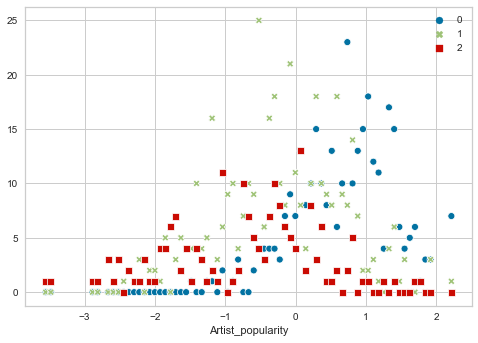

In [219]:
# song_pop=pd.crosstab(df_std.Popularity,df_std.cluster_kmeans)
# sns.scatterplot(data=song_pop)
artist_pop=pd.crosstab(df_std.Artist_popularity,df_std.cluster_kmeans)
sns.scatterplot(data=artist_pop)
# energyplt=pd.crosstab(df1.energy,df1.cluster_kmeans)
# sns.scatterplot(data=energyplt)
# loudnessplt=pd.crosstab(df1.loudness,df1.cluster_kmeans)
# sns.scatterplot(data=loudnessplt)
# danceabilityplt=pd.crosstab(df1.danceability,df1.cluster_kmeans)
# sns.scatterplot(data=danceabilityplt)

In [224]:
score_std = silhouette_score(df_std.drop("cluster_kmeans", axis=1), df_std["cluster_kmeans"], metric='euclidean')
score_std

0.13921440254069645

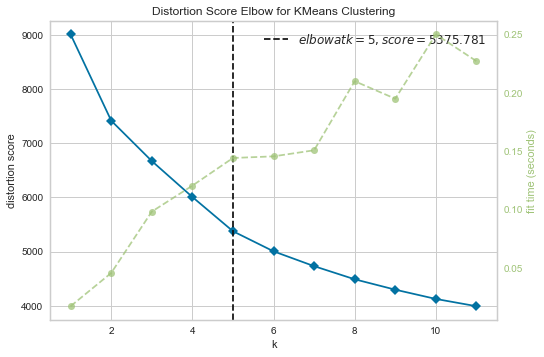

In [223]:
model_std = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_std.drop("cluster_kmeans", axis=1))
visualizer.poof();

C:\Users\alexi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alexi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x720 with 0 Axes>

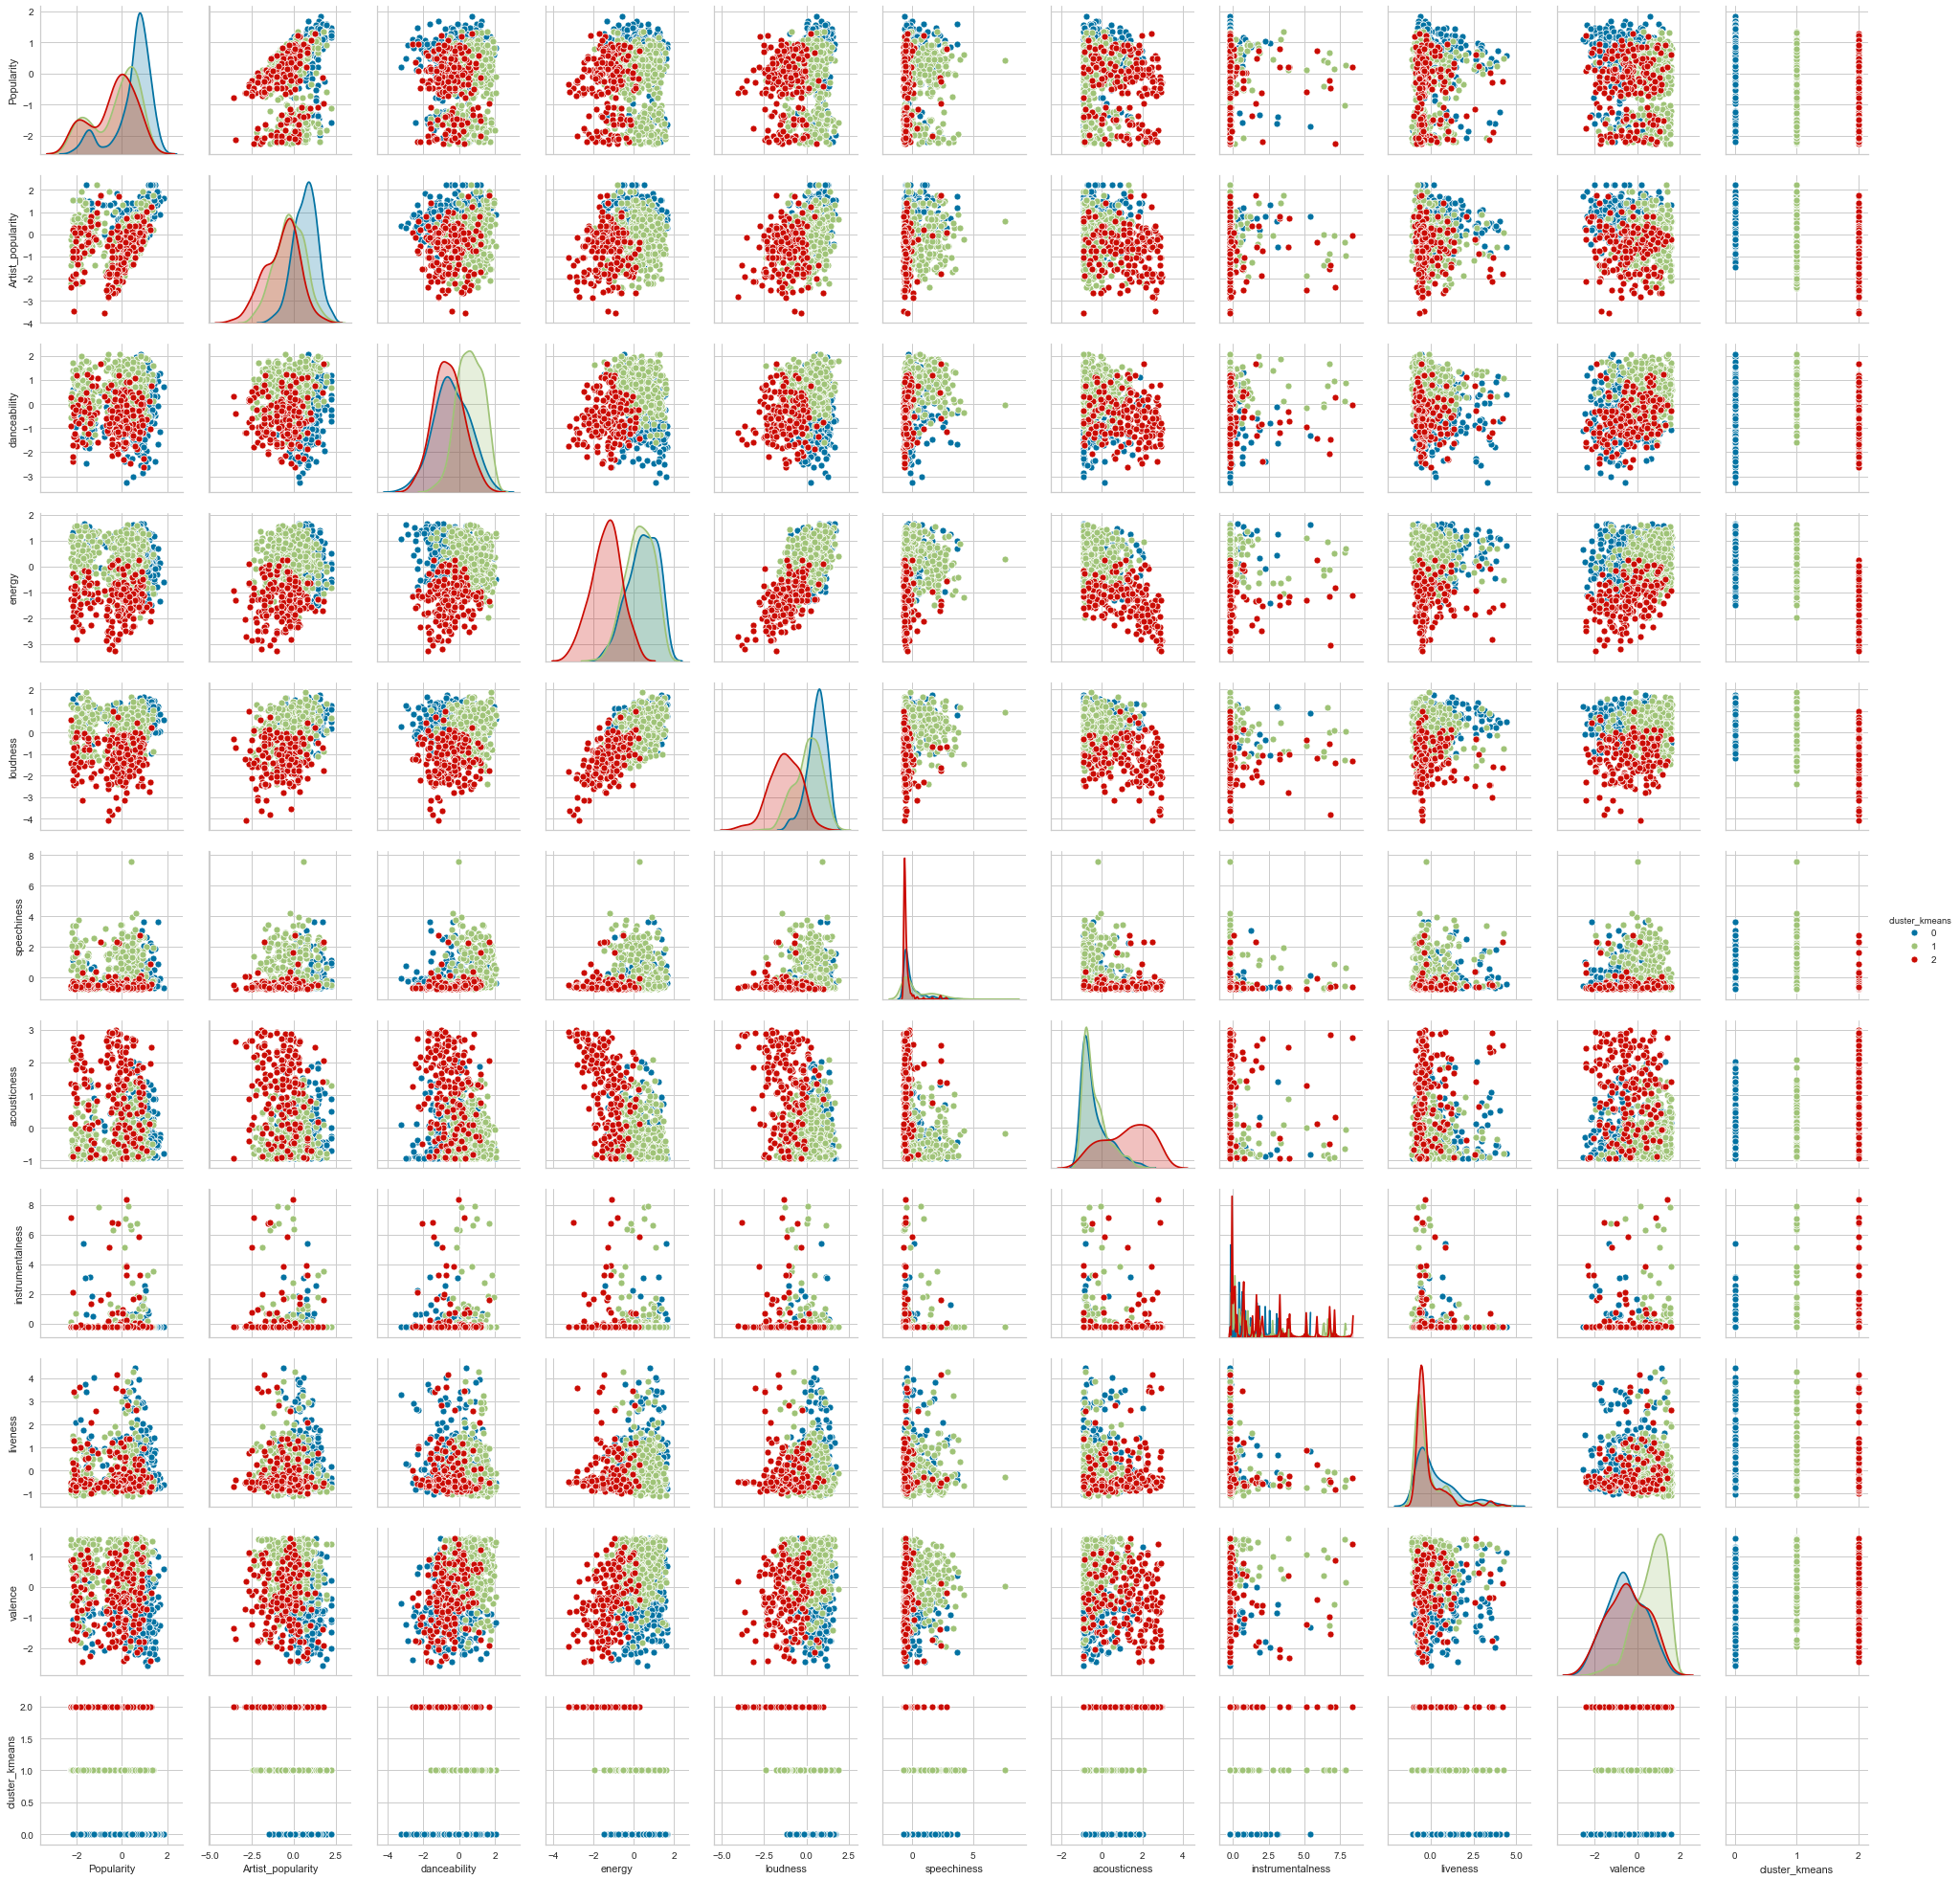

In [226]:
plt.figure(figsize=(10,10))
sns.pairplot(df_std, hue="cluster_kmeans")

In [227]:
pca_std=PCA(2)
pca_std.fit(df_std.drop("cluster_kmeans", axis=1))
pca_std.explained_variance_ratio_

array([0.2617107 , 0.14852422])

In [229]:
df_pca_std=pca.fit_transform(df_std.drop("cluster_kmeans", axis=1))
df_pca_std=pd.DataFrame(data=df_pca_std,columns=['pc1','pc2'])
df_pca_std["cluster_kmeans"] = df_std["cluster_kmeans"]

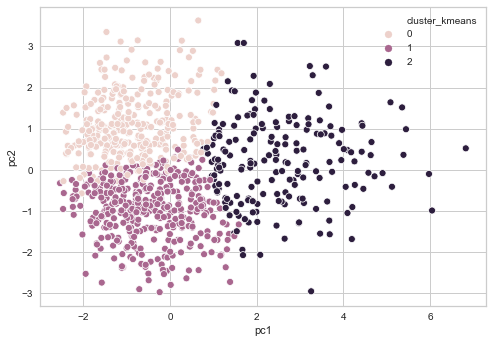

In [230]:
sns.scatterplot(x='pc1',y='pc2',data=df_pca_std,hue='cluster_kmeans')

## Cluster Analysis for k-means 

In [133]:
df1['cluster_kmeans']=km.fit_predict(df1)

In [162]:
df1

Popularity  \
Song                                                             
Dreams                                                    22.0   
Rocket Man (I Think It's Going To Be A Long Lon...        28.0   
Stumblin' In                                              55.0   
Listen to the Music                                       59.0   
My Sweet Lord                                             18.0   
Solsbury Hill                                             18.0   
How Long                                                  56.0   
Superstition - Single Version                             23.0   
You're so Vain                                            76.0   
Forever In Blue Jeans                                     11.0   
Sweet Home Alabama                                        15.0   
Easy                                                      25.0   
Escape (The Pina Colada Song)                             67.0   
The First Cut Is the Deepest                              60.0   
Come and Get Your Love - Single Version                   79.0   
Dreadlock Holiday                                         18.0   
Don't Go Breaking My Heart                                26.0   
Give A Little Bit                                         23.0   
Rich Girl                                                 70.0   
Midnight Train to Georgia                                 63.0   
Take Me Home, Country Roads - Rerecorded                  78.0   
Jolene                                                    76.0   
It Never Rains in Southern California                     49.0   
Lean on Me                                                53.0   
Alone Again (Naturally)                                   53.0   
Love Grows (Where My Rosemary Goes)                        0.0   
Piano Man                                                 74.0   
Rock the Boat                                             60.0   
50 Ways to Leave Your Lover                               69.0   
American Pie                                              73.0   
...                                                        ...   
Footloose - From "Footloose" Soundtrack                   69.0   
Kokomo                                                    58.0   
Dancing On The Ceiling                                    65.0   
Tell Her About It                                         36.0   
Two Strong Hearts                                         58.0   
Jack & Diane                                              74.0   
If I Could Turn Back Time                                 72.0   
How Will I Know                                           70.0   
We Built This City                                         7.0   
Crazy Little Thing Called Love - Remastered 2011          66.0   
What I Like About You                                     59.0   
Summer Rain                                               53.0   
Pressure Down                                             55.0   
Love Shack - Edit                                         61.0   
We Didn't Start the Fire                                  74.0   
Together In Electric Dreams - 2003 - Remaster             11.0   
Wake Me up Before You Go-Go                               79.0   
The Boys Of Summer                                        77.0   
I Think We're Alone Now                                   14.0   
I'm Gonna Be (500 Miles)                                  72.0   
Raspberry Beret                                           69.0   
Centerfold                                                72.0   
You're the Voice                                          61.0   
Jump (For My Love)                                        62.0   
Karma Chameleon - Remastered                              74.0   
Nothing's Gonna Stop Us Now                               76.0   
Chain Reaction                                            54.0   
The Tide Is High                                          58.0   
Get Outta My Dreams, Get i

In [174]:
c1=df1.loc[df1.cluster_kmeans==1]
c1.describe()

Popularity  Artist_popularity  danceability      energy    loudness  \
count  195.000000         195.000000    195.000000  195.000000  195.000000   
mean    15.097436          70.646154      0.655256    0.655708   -8.327646   
std      9.595733          13.182420      0.151156    0.201939    3.602566   
min      0.000000          23.000000      0.279000    0.103000  -19.521000   
25%      6.000000          63.000000      0.543000    0.518500  -10.708500   
50%     15.000000          72.000000      0.658000    0.682000   -7.922000   
75%     22.000000          79.000000      0.775500    0.821000   -5.681500   
max     42.000000         100.000000      0.955000    0.987000   -1.292000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   195.000000    195.000000        195.000000  195.000000  195.000000   
mean      0.098107      0.230704          0.018241    0.180708    0.636069   
std       0.100060      0.253386          0.085674    0.147783    0.224063   
min       0.022800      0.000084          0.000000    0.021500    0.084400   
25%       0.034900      0.030100          0.000000    0.084800    0.474500   
50%       0.048900      0.122000          0.000004    0.123000    0.678000   
75%       0.117500      0.385500          0.001017    0.256500    0.812000   
max       0.474000      0.919000          0.712000    0.792000    0.968000   

       cluster_kmeans  
count           195.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0

In [173]:
c0=df1.loc[df1.cluster_kmeans==0]
c0.describe()

Popularity  Artist_popularity  danceability      energy    loudness  \
count  292.000000         292.000000     292.00000  292.000000  292.000000   
mean    54.513699          57.773973       0.66387    0.596633   -9.736702   
std      8.485473          10.078571       0.14418    0.215329    3.864998   
min     35.000000          22.000000       0.28000    0.010900  -22.932000   
25%     48.000000          51.000000       0.56700    0.452250  -12.373750   
50%     55.000000          59.000000       0.67500    0.631500   -9.315000   
75%     60.250000          65.000000       0.76450    0.771500   -6.719250   
max     72.000000          84.000000       0.96400    0.969000   -3.052000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   292.000000    292.000000        292.000000  292.000000  292.000000   
mean      0.093468      0.291956          0.031085    0.182008    0.645778   
std       0.099209      0.290232          0.116855    0.148151    0.210941   
min       0.023100      0.000038          0.000000    0.035100    0.086200   
25%       0.033575      0.057500          0.000000    0.091300    0.496000   
50%       0.045000      0.182500          0.000014    0.118500    0.679500   
75%       0.098175      0.486500          0.001975    0.222500    0.829000   
max       0.445000      0.968000          0.759000    0.851000    0.972000   

       cluster_kmeans  
count           292.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

In [175]:
c2=df1.loc[df1.cluster_kmeans==2]
c2.describe()

Popularity  Artist_popularity  danceability      energy    loudness  \
count   414.00000         414.000000    414.000000  414.000000  414.000000   
mean     74.26087          78.391304      0.642541    0.699229   -6.843145   
std       8.34223           8.299276      0.156856    0.170829    2.975617   
min      46.00000          59.000000      0.162000    0.193000  -18.064000   
25%      70.00000          72.000000      0.533000    0.566750   -8.186750   
50%      74.00000          78.000000      0.650000    0.720000   -6.145500   
75%      79.00000          84.000000      0.760000    0.834000   -4.781000   
max     100.00000         100.000000      0.966000    0.988000   -2.042000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   414.000000    414.000000        414.000000  414.000000  414.000000   
mean      0.097471      0.184134          0.014838    0.188252    0.598537   
std       0.100123      0.198299          0.061000    0.153530    0.224771   
min       0.022800      0.000026          0.000000    0.017000    0.056400   
25%       0.037800      0.025725          0.000000    0.085350    0.445250   
50%       0.054300      0.113500          0.000002    0.124500    0.615000   
75%       0.107750      0.269750          0.000185    0.241750    0.777000   
max       0.855000      0.905000          0.581000    0.826000    0.978000   

       cluster_kmeans  
count           414.0  
mean              2.0  
std               0.0  
min               2.0  
25%               2.0  
50%               2.0  
75%               2.0  
max               2.0

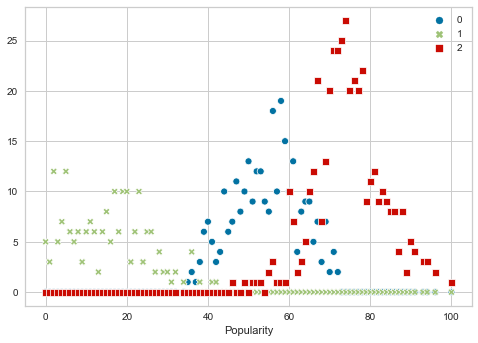

In [165]:
song_pop=pd.crosstab(df1.Popularity,df1.cluster_kmeans)
sns.scatterplot(data=song_pop)

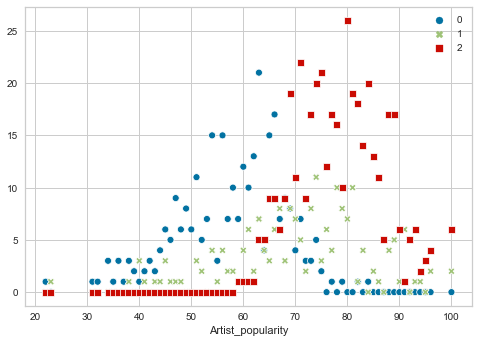

In [166]:
artist_pop=pd.crosstab(df1.Artist_popularity,df1.cluster_kmeans)
sns.scatterplot(data=artist_pop)

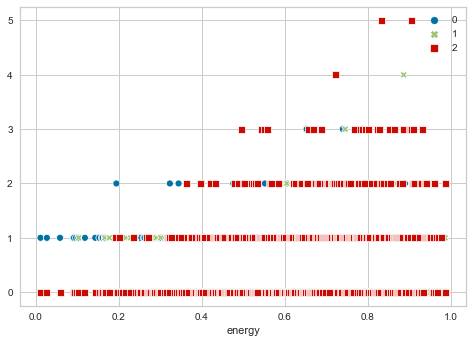

In [170]:
energyplt=pd.crosstab(df1.energy,df1.cluster_kmeans)
sns.scatterplot(data=energyplt)

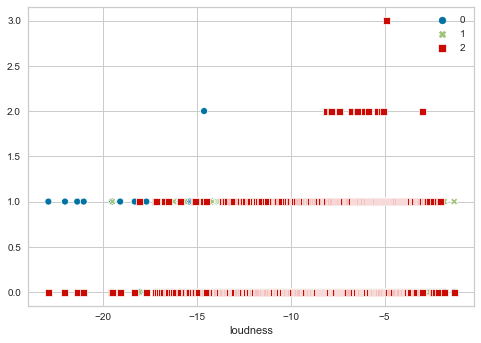

In [172]:
loudnessplt=pd.crosstab(df1.loudness,df1.cluster_kmeans)
sns.scatterplot(data=loudnessplt)

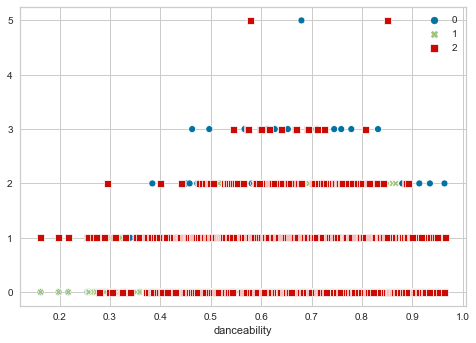

In [171]:
danceabilityplt=pd.crosstab(df1.danceability,df1.cluster_kmeans)
sns.scatterplot(data=danceabilityplt)

C:\Users\alexi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alexi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x720 with 0 Axes>

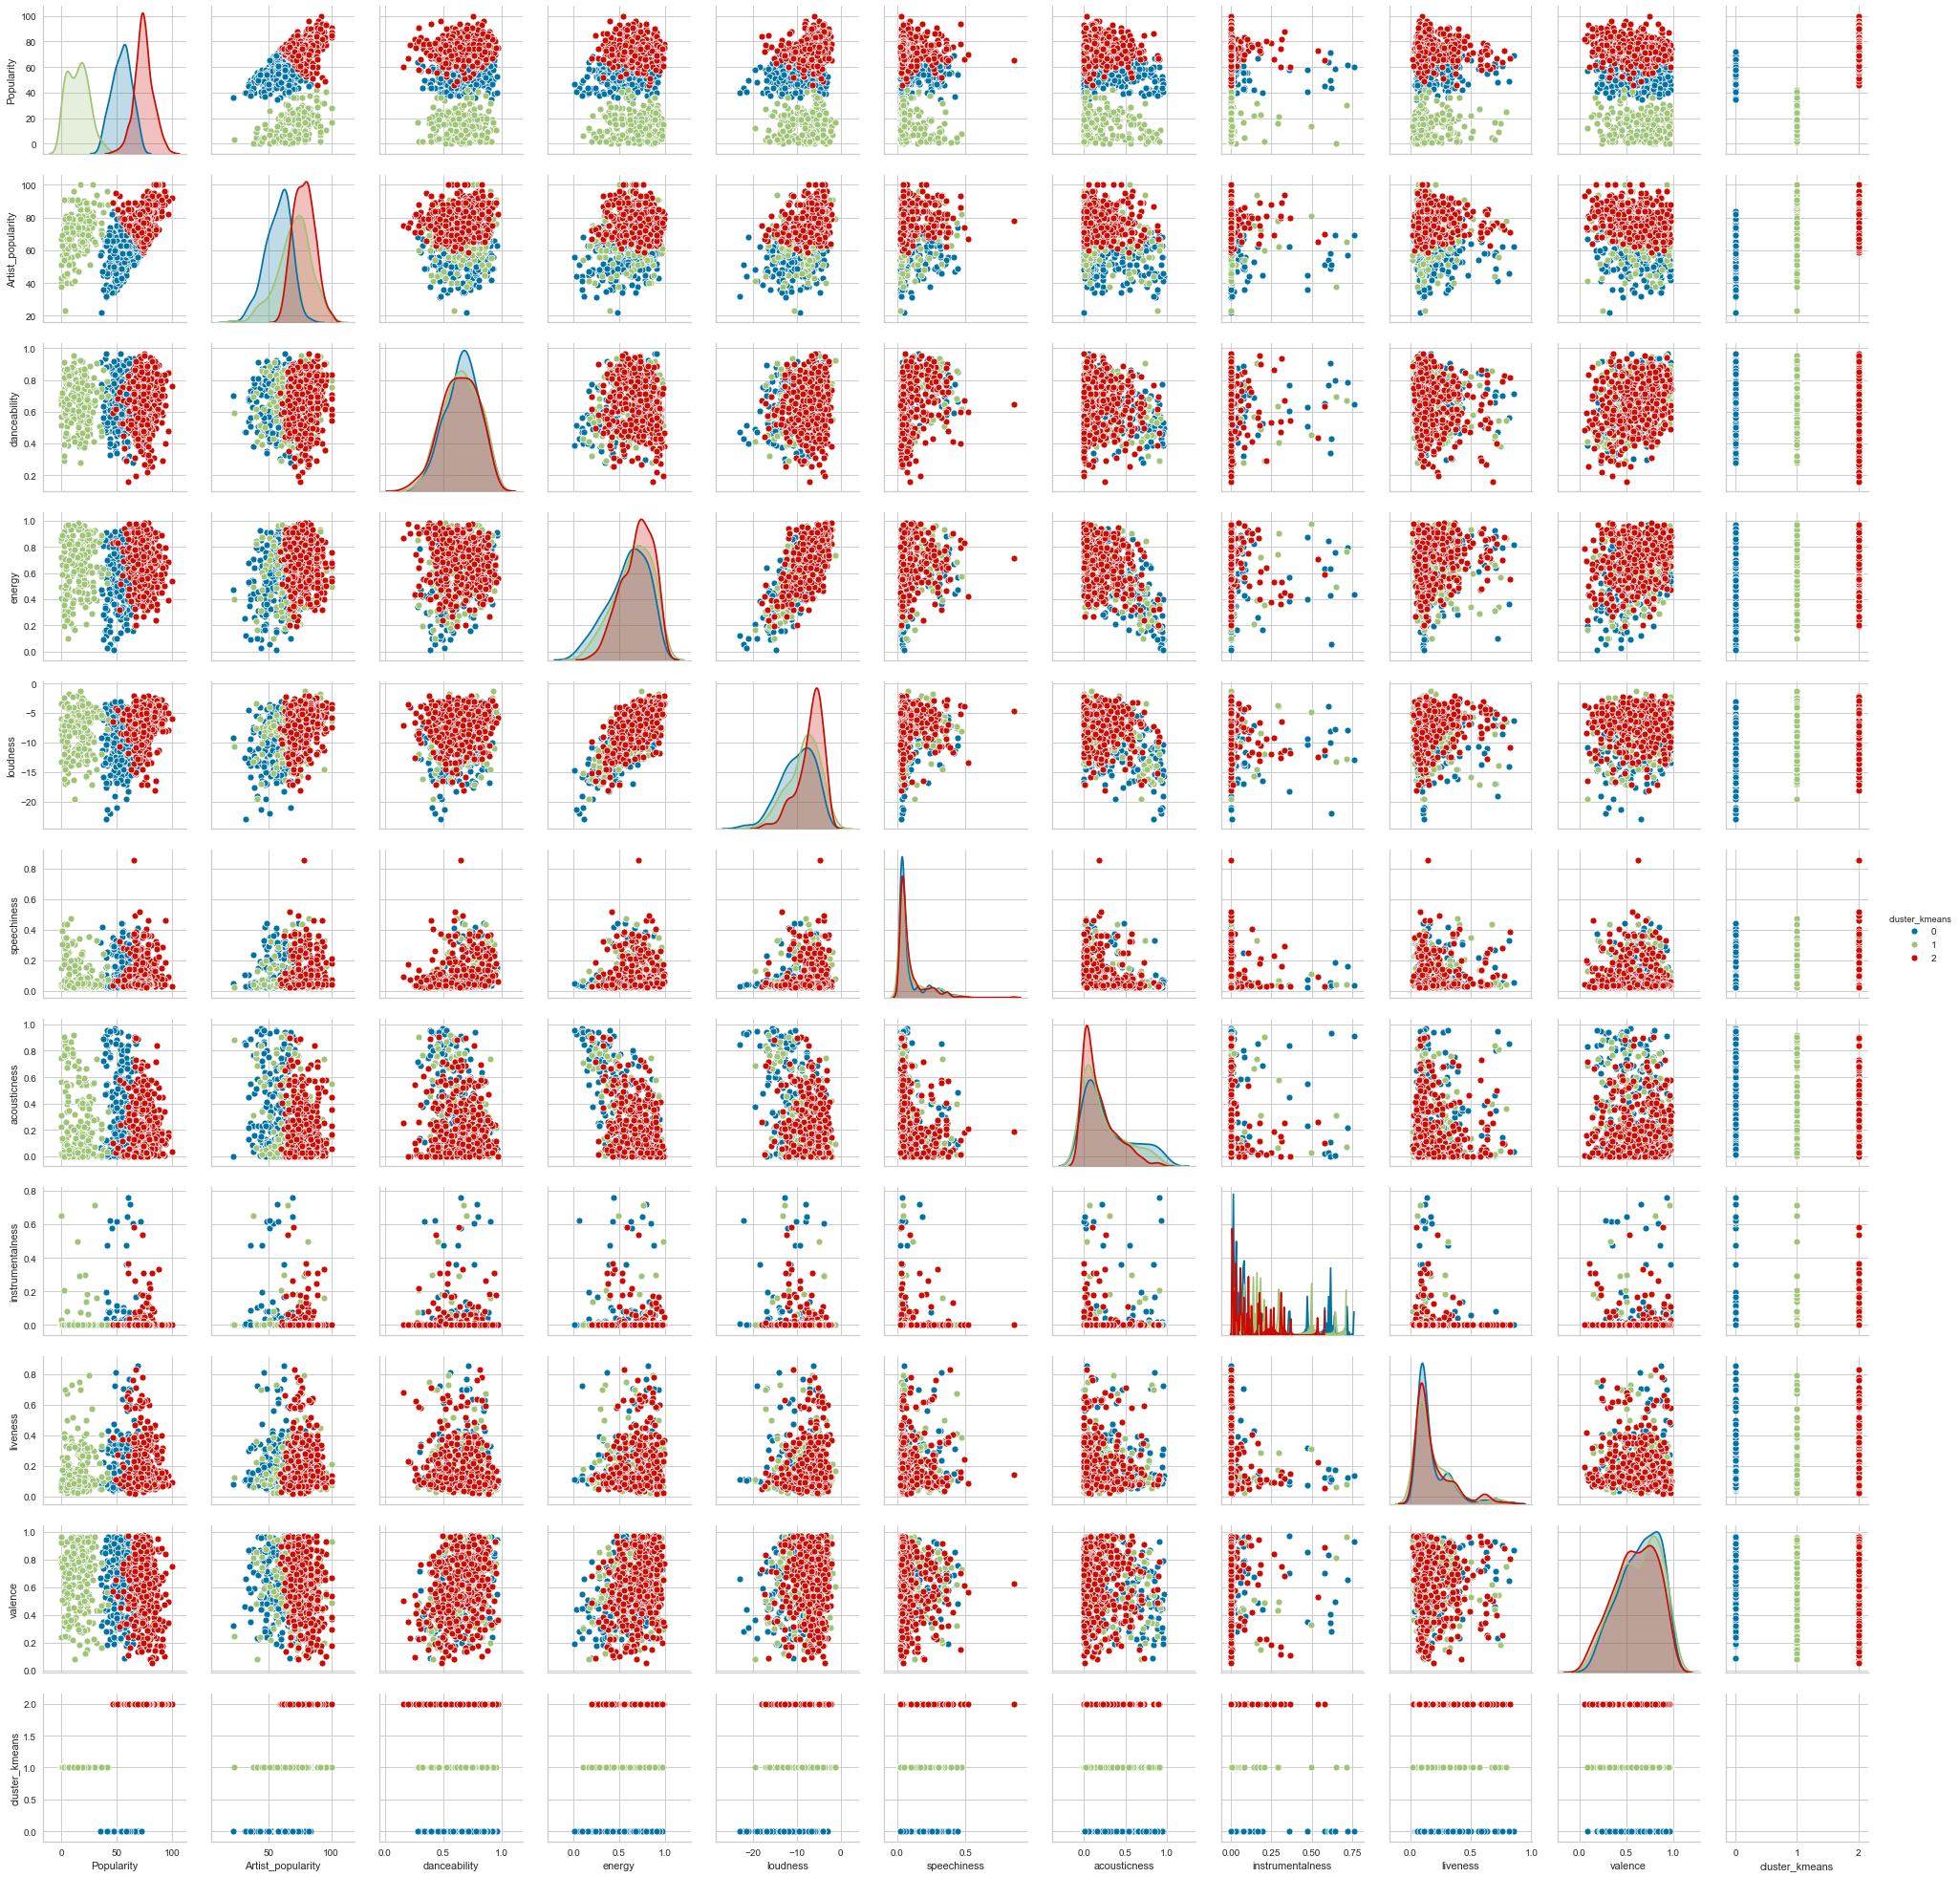

In [161]:
plt.figure(figsize=(10,10))
sns.pairplot(df1, hue="cluster_kmeans")

## Agglomerative Clustering 

## DB-Scan 

## fuzzy c-means 

In [113]:
from __future__ import division, print_function
import skfuzzy as fuzz

In [107]:
!pip install scikit-fuzzy

  Stored in directory: C:\Users\alexi\AppData\Local\pip\Cache\wheels\9d\f9\0e\a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


In [116]:
fpc=fuzz.cluster.cmeans(df1,3, 2, error=0.005, maxiter=1000, init=None)

In [117]:
fpcs = []
fpcs.append(fpc)

In [123]:
fpcs

[(array([[-1.57527152, -0.83814972, -1.24745678, ..., -0.53779575,
          -0.41837091, -0.88943462],
         [21.99251893, 27.99266578, 54.98649318, ..., 57.98709608,
          59.98683554, 57.98665785],
         [80.98976627, 82.99026774, 53.99288976, ..., 68.9919435 ,
          62.99265001, 62.99234359]]),
  array([[4.82961299e-08, 1.35011380e-08, 9.99072731e-01, 9.99111309e-01,
          9.75734372e-01, 9.99635066e-01, 9.99452222e-01, 9.99675218e-01,
          9.99559171e-01, 9.99100513e-01],
         [9.99999726e-01, 8.83994355e-08, 5.42135793e-04, 5.19608403e-04,
          1.40425790e-02, 2.13218656e-04, 3.20103130e-04, 1.89751272e-04,
          2.57599027e-04, 5.25874174e-04],
         [2.25624076e-07, 9.99999898e-01, 3.85133090e-04, 3.69082486e-04,
          1.02230489e-02, 1.51715630e-04, 2.27675208e-04, 1.35030938e-04,
          1.83229912e-04, 3.73613277e-04]]),
  array([[0.19320286, 0.28556194, 0.01234215, 0.55353153, 0.74389859,
          0.21761815, 0.16199356, 0.52575

KeyboardInterrupt: 

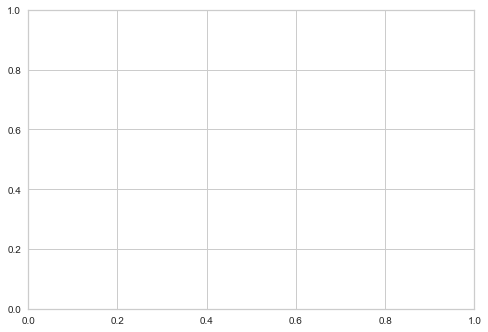

In [129]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_, fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

TypeError: '(0, array([ True, False, False, False, False, False, False, False, False,
       False]))' is an invalid key

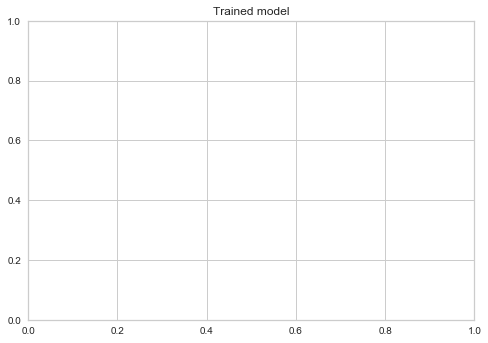

In [132]:
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    df1, 3, 2, error=0.005, maxiter=1000)

fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
for j in range(3):
    ax2.plot(df1[0, u_orig.argmax(axis=0) == j],
             df1[1, u_orig.argmax(axis=0) == j], 'o',
             label='series ' + str(j))
ax2.legend()

In [ ]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    df1.T, cntr, 2, error=0.005, maxiter=1000)

# Test cosimilarité avec popularité

In [233]:
songs_df = df1.drop("cluster_kmeans", axis=1)

In [236]:
cos_mat = cosine_similarity(songs_df)

In [396]:
pd.DataFrame(cos_mat).describe()

0           1           2           3           4           5    \
count  901.000000  901.000000  901.000000  901.000000  901.000000  901.000000   
mean     0.987739    0.989982    0.990443    0.988467    0.991442    0.991631   
std      0.019735    0.017676    0.017353    0.019288    0.016146    0.015648   
min      0.744098    0.760007    0.760807    0.745464    0.769153    0.775261   
25%      0.986238    0.989516    0.990174    0.987208    0.992308    0.992360   
50%      0.994251    0.996007    0.996266    0.994986    0.996520    0.996787   
75%      0.998101    0.998392    0.998447    0.998423    0.998510    0.998185   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              6           7           8           9    ...         891  \
count  901.000000  901.000000  901.000000  901.000000  ...  901.000000   
mean     0.988243    0.992299    0.992744    0.988377  ...    0.990775   
std      0.019437    0.014029    0.014281    0.019146  ...    0.017020   
min      0.746201    0.785731    0.785567    0.747939  ...    0.763524   
25%      0.986526    0.992906    0.993949    0.987231  ...    0.990745   
50%      0.994697    0.996186    0.996860    0.994644  ...    0.996573   
75%      0.998515    0.998093    0.998568    0.998104  ...    0.998563   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              892         893         894         895         896         897  \
count  901.000000  901.000000  901.000000  901.000000  901.000000  901.000000   
mean     0.990961    0.989911    0.990703    0.993004    0.991147    0.989849   
std      0.016740    0.017378    0.016864    0.011340    0.009573    0.018083   
min      0.764194    0.757614    0.764640    0.809343    0.836284    0.756802   
25%      0.990884    0.989657    0.990727    0.992327    0.988583    0.989345   
50%      0.996624    0.996050    0.996340    0.995726    0.993008    0.996023   
75%      0.998452    0.998046    0.998233    0.997658    0.996605    0.998584   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              898         899         900  
count  901.000000  901.000000  901.000000  
mean     0.992320    0.991562    0.990974  
std      0.011282    0.009785    0.016653  
min      0.812717    0.827409    0.768572  
25%      0.991144    0.989310    0.991476  
50%      0.995090    0.993358    0.996310  
75%      0.997252    0.996688    0.998374  
max      1.000000    1.000000    1.000000  

[8 rows x 901 columns]

In [392]:
songs_df.sample(50)

danceability  energy  \
Song                                                                       
Good Times Bad Times - 1993 Remaster                       0.476  0.7170   
Thnks fr th Mmrs                                           0.459  0.8840   
Back to the Hotel                                          0.700  0.4760   
Jolene                                                     0.674  0.5370   
¿Quién Te Dijo Eso?                                        0.525  0.5790   
Te lo agradezco, pero no                                   0.760  0.6890   
i'm so tired...                                            0.599  0.7330   
Creep                                                      0.532  0.3440   
Born To Be Wild                                            0.438  0.7100   
Tha Crossroads                                             0.684  0.4340   
Arms of Mary                                               0.670  0.5270   
I Think We're Alone Now                                    0.750  0.7230   
The Kill (Bury Me)                                         0.309  0.9120   
People Are People                                          0.680  0.8290   
The London (feat. J. Cole & Travis Scott)                  0.796  0.5860   
I Got You Babe                                             0.756  0.6100   
Black and Yellow                                           0.684  0.8340   
I Still Haven't Found What I'm Looking For - Re...         0.565  0.7640   
Come As You Are                                            0.505  0.8250   
Lollipop                                                   0.829  0.4280   
C.R.E.A.M.                                                 0.479  0.5490   
Both Sides Now                                             0.352  0.3000   
Music Is Love                                              0.477  0.2800   
Ride It                                                    0.893  0.7480   
Kiss You All Over                                          0.741  0.2670   
One Kiss (with Dua Lipa)                                   0.791  0.8620   
The Show Must Go On - Remastered 2011                      0.426  0.6870   
House Of The Rising Sun                                    0.324  0.5510   
You Ain't a Killer                                         0.724  0.8870   
Love Shack                                                 0.715  0.8170   
Material Girl                                              0.742  0.8830   
Everybody Plays the Fool                                   0.485  0.6410   
Paint It, Black - Mono                                     0.505  0.8360   
Light My Fire                                              0.413  0.7250   
Lost Ones                                                  0.832  0.7490   
Mr. Tambourine Man                                         0.466  0.4530   
Boogie Wonderland                                          0.802  0.7560   
House Of The Rising Sun                                    0.389  0.0109   
Grandma's Hands                                            0.731  0.3110   
Universal Soldier                                          0.518  0.2830   
Honky Tonk Women - Mono Version                            0.562  0.7680   
With Or Without You - Remastered                           0.538  0.4320   
I Don't Care (with Justin Bieber)                          0.798  0.6750   
You Are So Beautiful                                       0.387  0.1940   
Lungs                                                      0.542  0.3400   
All Right Now                                              0.766  0.4460   
We Didn't Start the Fire                                   0.712  0.9670   
Osez Joséphine                                             0.691  0.8260   
Cecilia                                                    0.755  0.8760   
Pancho & Lefty                                             0.636  0.2770   

                                                    loudness  speechiness  \
Song                  

In [299]:
len(cos_mat[0])

901

In [261]:
songs_df.index.get_loc("Dreams")

0

In [262]:
songs_df.iloc[cos_mat[0].argsort()[::-1][1:9]]

Popularity  Artist_popularity  danceability  \
Song                                                                           
Dreadlock Holiday                      18.0               64.0         0.837   
Wonderful Tonight                      22.0               75.0         0.570   
The Chain                              22.0               81.0         0.546   
Valerie                                17.0               64.0         0.722   
Creep                                  21.0               78.0         0.532   
I Think We're Alone Now                14.0               57.0         0.750   
The Weight - Remastered                20.0               66.0         0.630   
Last Night A D.J. Saved My Life        12.0               48.0         0.851   

                                 energy  loudness  speechiness  acousticness  \
Song                                                                           
Dreadlock Holiday                 0.380   -13.341       0.0640       0.54100   
Wonderful Tonight                 0.208   -15.661       0.0295       0.66600   
The Chain                         0.529   -13.600       0.0436       0.06290   
Valerie                           0.518   -10.780       0.0296       0.59300   
Creep                             0.344   -13.057       0.0350       0.00563   
I Think We're Alone Now           0.723   -12.117       0.0485       0.02470   
The Weight - Remastered           0.519   -10.997       0.0528       0.22500   
Last Night A D.J. Saved My Life   0.662    -7.518       0.2010       0.04700   

                                 instrumentalness  liveness  valence  
Song                                                                  
Dreadlock Holiday                        0.007890    0.1980    0.892  
Wonderful Tonight                        0.140000    0.1230    0.508  
The Chain                                0.000567    0.0383    0.574  
Valerie                                  0.004530    0.0854    0.753  
Creep                                    0.000473    0.1150    0.126  
I Think We're Alone Now                  0.004140    0.0215    0.946  
The Weight - Remastered                  0.000004    0.0974    0.502  
Last Night A D.J. Saved My Life          0.000028    0.1480    0.875

# test cosim sans popularité

In [ ]:
pd.DataFrame(cos_mat).describe()

In [397]:
songs_df = df1.drop(["Popularity", "Artist_popularity", "cluster_kmeans"], axis=1)
cos_mat = cosine_similarity(songs_df)
results = cos_mat[songs_df.index.get_loc("The London (feat. J. Cole & Travis Scott)")]
sorted_songs = results.argsort()[::-1][1:20]
#print(sorted_songs)
sorted_results = results[sorted_songs]
i = 0
for song in songs_df.iloc[sorted_songs].index:
    print(sorted_results[i], song)
    i += 1

0.9998059417971741 BiPolar (feat. Quavo)
0.9997049596215811 Praise The Lord (Da Shine) (feat. Skepta)
0.9996673996274685 No Guidance (feat. Drake)
0.9995071384120794 Never Tear Us Apart
0.9994847412678929 Hip Hop
0.9994478177112259 Ransom
0.9994104673216099 Wow.
0.9991866385267881 The Flute Song
0.9991608249858608 Un Siglo Sin Ti
0.9991418441377959 Talk
0.9991165256843054 Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)
0.9991079274627006 Ghetto Supastar (That is What You Are) (feat. Ol' Dirty Bastard & Mýa)
0.9990972491819536 (I've Had) The Time of My Life - From "Dirty Dancing" Soundtrack
0.9990895676852302 Changes
0.9990807250942291 Won't Be Late (feat. Drake)
0.9990713499394489 Clout (feat. Cardi B)
0.998971810468634 Hotline Bling
0.9989158088127594 Get Low
0.9988106129224974 Chlorine


## Getting most frequent Genres 

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

In [302]:
df.head()

Artist               Artist_id                 Song_id  \
0        Fleetwood Mac  08GQAI4eElDnROBrJRGE0X  703BT1NQsfIwPFv8MXQ47m   
1           Elton John  3PhoLpVuITZKcymswpck5b  2zvot9pY2FNl1E94kc4K8M   
2          Suzi Quatro  15jHZ1EZwmm2QDjKctvqJQ  2NKZe36oAGEpBx26OoBFLj   
3  The Doobie Brothers  39T6qqI0jDtSWWioX8eGJz  2fja4gHzPsIXiK4bMeU0hN   
4      George Harrison  7FIoB5PHdrMZVC3q2HE5MS  1chu8wc9zbNqTQ2ahROys1   

                                                Song  Popularity  \
0                                             Dreams          22   
1  Rocket Man (I Think It's Going To Be A Long Lo...          28   
2                                       Stumblin' In          55   
3                                Listen to the Music          59   
4                                      My Sweet Lord          18   

                                              genres  Artist_popularity  \
0  ['album rock', 'classic rock', 'mellow gold', ...               81.0   
1  ['glam rock', 'mellow gold', 'piano rock', 'ro...               83.0   
2                    ['classic uk pop', 'glam rock']               54.0   
3  ['album rock', 'art rock', 'blues-rock', 'clas...               70.0   
4  ['album rock', 'classic rock', 'folk rock', 'm...               70.0   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.823   0.338   -15.899       0.0413        0.1390   
1         0.601   0.532    -9.119       0.0286        0.4320   
2         0.758   0.634   -13.338       0.0324        0.1270   
3         0.643   0.526   -15.147       0.0349        0.2140   
4         0.537   0.685    -8.935       0.0333        0.0705   

   instrumentalness  liveness  valence  
0          0.001290    0.5000    0.785  
1          0.000006    0.0925    0.341  
2          0.000431    0.3370    0.905  
3          0.000004    0.0690    0.881  
4          0.000000    0.0839    0.542

In [102]:
df_gr=df.copy()

In [103]:
df_gr.drop(["Artist_id"],inplace=True,axis=1)

In [104]:
df_gr.genres.fillna('[]', inplace=True)

In [20]:
# df_gr.reset_index(inplace=True)

In [105]:
df_gr.set_index(['Song'],inplace=True)

In [106]:
df_gr['genres1']=df_gr.genres.map(eval)

In [107]:
gr=[]
for i in df_gr.genres1:
    for j in i:
        if j not in gr:
            gr.append(j)

print(gr)

['album rock', 'classic rock', 'mellow gold', 'rock', 'soft rock', 'yacht rock', 'glam rock', 'piano rock', 'classic uk pop', 'art rock', 'blues-rock', 'country rock', 'folk rock', 'hard rock', 'heartland rock', 'psychedelic rock', 'roots rock', 'art pop', 'permanent wave', 'symphonic rock', 'motown', 'quiet storm', 'soul', 'adult standards', 'brill building pop', 'folk', 'singer-songwriter', 'southern rock', 'classic soul', 'disco', 'funk', 'native american', 'dance rock', 'progressive rock', 'southern soul', 'country', 'country dawn', 'traditional country', 'bubblegum pop', 'nederpop', 'folk-pop', 'traditional folk', 'memphis soul', 'soul blues', 'reggae', 'new wave', 'protopunk', 'europop', 'swedish pop', 'bow pop', 'electric blues', 'nashville sound', 'canadian country', 'canadian folk', 'canadian singer-songwriter', 'british folk', 'modern blues', 'lounge', 'dance pop', 'girl group', 'hi-nrg', 'new wave pop', 'post-disco', 'chicago soul', 'sunshine pop', 'rhythm and blues', 'lilit

In [108]:
for g in gr :
    df_gr[g] = df_gr.genres.str.contains(g)

In [109]:
clm=list(df_gr.columns)
clm=clm[15:]

In [110]:
df_gr[clm]=df_gr[clm].astype(int)

In [150]:
df_gr.index[827]

'The World Is Yours'

In [198]:
df_gr.sample(50)

Artist  \
Song                                                                      
Damn It Feels Good to Be a Gangsta                            Geto Boys   
Stoned Soul Picnic                                           Laura Nyro   
Sugar, We're Goin Down                                     Fall Out Boy   
Should I Stay or Should I Go - Remastered                     The Clash   
Black Dog - Remaster                                       Led Zeppelin   
Broke Leg (with Quavo & Tyga)                                Tory Lanez   
Better Now                                                  Post Malone   
Dancing On The Ceiling                                    Lionel Richie   
You Ain't a Killer                                              Big Pun   
Lover                                                      Taylor Swift   
Leather and Lace (with Don Henley)                         Stevie Nicks   
Beautiful (feat. Camila Cabello)                                  Bazzi   
Back to the Hotel                                                N2Deep   
It's Tricky                                                  Run–D.M.C.   
Don't Stop - 2004 Remaster                                Fleetwood Mac   
Just Don't Give A Fuck                                           Eminem   
Highway to Hell                                                   AC/DC   
Stay (Don't Go Away) [feat. Raye]                          David Guetta   
365                                                                Zedd   
ZEZE (feat. Travis Scott & Offset)                          Kodak Black   
That's the Way the World Goes Round                          John Prine   
Lemon Tree                                                 Fools Garden   
Happy Now                                                          Zedd   
X                                                                Xzibit   
All This Love (feat. Harlœ)                                Robin Schulz   
Ready or Not                                                     Fugees   
It'll Take A Long Time                                      Sandy Denny   
Don't Stop Believin'                                            Journey   
My Sharona                                                    The Knack   
Happier                                                      Marshmello   
Alone Again (Naturally)                              Gilbert O'Sullivan   
Down On The Corner                         Creedence Clearwater Revival   
Oh, Susanna                                                 Pete Seeger   
The Hustle - Original Mix                                     Van McCoy   
It Was A Good Day                                              Ice Cube   
The Last Thing on My Mind                                    Tom Paxton   
Ni Tú Ni Nadie                                                    Mœnia   
Can't Stop                                        Red Hot Chili Peppers   
Centerfold                                            The J. Geils Band   
Baker Street                                             Gerry Rafferty   
Season of the Witch                                             Donovan   
Stars On 45 - Original Single Edit                          Stars On 45   
Heaven Is a Place on Earth                             Belinda Carlisle   
Gettin' Jiggy Wit It                                         Will Smith   
Paradise City                                             Guns N' Roses   
Who Knows Where The Time Goes?                      Fairport Convention   
Rock And Roll All Nite                                             KISS   
In Too Deep                                                      Sum 41   
Protect Ya Neck                                            Wu-Tang Clan   
I Love Rock 'N Roll                         Joan Jett & The Blackhearts   

                                                          Song_id  Popularity  \
Song                                                                            
Da

In [236]:
g = input("Enter your song : ") 
print(g)

Enter your song : I Love Rock 'N Roll
I Love Rock 'N Roll


In [237]:
webbrowser.open('https://open.spotify.com/track/2MuJbBWAVewREJmB8WdGJ3')

True

In [238]:
i_d0=df_gr.loc[g][1]
webbrowser.open('https://open.spotify.com/track/'+i_d0)

True

In [239]:
songs_df_gr = df_gr.drop(["Popularity", "Artist_popularity","genres","Artist","genres1","Song_id"], axis=1)
cos_mat = cosine_similarity(songs_df_gr)
results = cos_mat[songs_df_gr.index.get_loc(g)]
sorted_songs = results.argsort()[::-1][1:20]
sorted_results = results[sorted_songs]
i = 0
song_list=[]
for song in songs_df_gr.iloc[sorted_songs].index:
    song_list.append(song)
    print(sorted_results[i], song)
    i += 1

0.9824571424352475 Crazy Little Thing Called Love - Remastered 2011
0.9819243160909178 Crazy Little Thing Called Love - Remastered 2011
0.9811227006365196 You Don't Fool Me - Remastered 2011
0.9796085747340434 No Roots
0.9788287259282048 We Will Rock You - Remastered
0.9784980824766074 Dancing In The Moonlight
0.9774798937090534 Lost on You
0.9773911900434676 Another One Bites The Dust - Remastered 2011
0.977165861462057 Under Pressure - Remastered
0.977101042284057 Another One Bites The Dust - Remastered 2011
0.97620983004749 Under Pressure - Remastered
0.9754239728145886 Les poèmes de Michelle
0.9732683741886761 Bye Bye - Refugee Camp Band Remix
0.9732596643902114 (I've Had) The Time of My Life - From "Dirty Dancing" Soundtrack
0.9725432791301681 Escape (The Pina Colada Song)
0.9721232417482263 Easy Lover
0.9718539620299801 Pressure Down
0.9717234373808961 Ride It
0.9714842211587917 I Want To Break Free


In [240]:
song_list

['Crazy Little Thing Called Love - Remastered 2011',
 'Crazy Little Thing Called Love - Remastered 2011',
 "You Don't Fool Me - Remastered 2011",
 'No Roots',
 'We Will Rock You - Remastered',
 'Dancing In The Moonlight',
 'Lost on You',
 'Another One Bites The Dust - Remastered 2011',
 'Under Pressure - Remastered',
 'Another One Bites The Dust - Remastered 2011',
 'Under Pressure - Remastered',
 'Les poèmes de Michelle',
 'Bye Bye - Refugee Camp Band Remix',
 '(I\'ve Had) The Time of My Life - From "Dirty Dancing" Soundtrack',
 'Escape (The Pina Colada Song)',
 'Easy Lover',
 'Pressure Down',
 'Ride It',
 'I Want To Break Free']

In [241]:
for i in song_list:
    f=pd.DataFrame(df_gr.loc[song_list[0]]).T
f

Song                       Crazy Little Thing Called Love - Remastered 2011  \
Artist                                                                Queen   
Song_id                                              6xdLJrVj4vIXwhuG8TMopk   
Popularity                                                               73   
genres                                                ['glam rock', 'rock']   
Artist_popularity                                                        89   
danceability                                                          0.599   
energy                                                                0.761   
loudness                                                             -6.887   
speechiness                                                          0.0421   
acousticness                                                          0.713   
instrumentalness                                                   4.74e-06   
liveness                                                              0.349   
valence                                                               0.712   
genres1                                                   [glam rock, rock]   
album rock                                                            False   
classic rock                                                              0   
mellow gold                                                               0   
rock                                                                      1   
soft rock                                                                 0   
yacht rock                                                                0   
glam rock                                                                 1   
piano rock                                                                0   
classic uk pop                                                            0   
art rock                                                                  0   
blues-rock                                                                0   
country rock                                                              0   
folk rock                                                                 0   
hard rock                                                                 0   
heartland rock                                                            0   
psychedelic rock                                                          0   
...                                                                     ...   
south african rock                                                        0   
groove metal                                                              0   
alternative country                                                       0   
cosmic american                                                           0   
new americana                                                             0   
outlaw country                                                            0   
texas country                                                             0   
american folk revival                                                     0   
chamber pop                                                               0   
freak folk                                                                0   
indie folk                                                                0   
slow core                                                                 0   
ectofolk                                                                  0   
ambient folk                                                              0   
anti-folk                                                                 0   
new weird america                                                         0   
appalachian folk                                                          0   
old-time                                                                  0   
traditional blues                                 

In [242]:
i_d=f.Song_id
i_d=i_d[0]

AttributeError: 'DataFrame' object has no attribute 'Song_id'

In [234]:
import webbrowser

webbrowser.open('https://open.spotify.com/track/'+i_d)

print(i_d)

# https://open.spotify.com/track/5tVA6TkbaAH9QMITTQRrNv

24vNw0Z0srb4zYXwrakw8E


In [235]:
for i in song_list:
    f1=pd.DataFrame(df_gr.loc[song_list[1]]).T
print(f1)
i_d1=f1.Song_id
i_d1=i_d1[0]
webbrowser.open('https://open.spotify.com/track/'+i_d1)
print(i_d1)

                  Artist                 Song_id Popularity  \
Method Man  Wu-Tang Clan  5XLC8xoqyua4U7wJiZAWik         61   

                                                       genres  \
Method Man  ['east coast hip hop', 'gangster rap', 'hardco...   

           Artist_popularity danceability energy loudness speechiness  \
Method Man                71        0.903  0.519  -10.109       0.307   

           acousticness  ... fourth world psychedelic folk  \
Method Man       0.0286  ...            0                0   

           scottish singer-songwriter cowboy western banjo  \
Method Man                          0              0     0   

           canadian indigenous crunk houston rap hyphy bboy  
Method Man                   0     0           0     0    0  

[1 rows x 348 columns]
5XLC8xoqyua4U7wJiZAWik
